<a href="https://colab.research.google.com/github/JulioBarriosUPC/PC1/blob/main/Practicando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g

In [3]:
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [4]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [40]:
def DFS(Grafo, origen):
  n = len(Grafo)
  visited = [False]*n
  padre = [None]*n

  def _DFS(origen1):
    if not visited[origen1]:
      visited[origen1] = True

      for vecinos in Grafo[origen1]:
        if not visited[vecinos]:
          padre[vecinos] = origen1
          _DFS(vecinos)

  _DFS(origen)

  return padre

In [16]:
def BFS(Grafo, origen):
  n = len(Grafo)
  visited = [False]*n # n elementos falsos
  padre = [None]*n
  
  cola = [origen]
  visited[origen] = True

  while cola:
    elemento = cola.pop(0)
    for vecino in Grafo[elemento]:
      if not visited[vecino]:
        visited[vecino] = True
        padre[vecino] = elemento
        cola.append(vecino)
  
  return padre

In [46]:
%%file Ejemplo
1 2
2 3
3 4
4 2
5 4
6 5 7
7 6

Overwriting Ejemplo


 0: [1, 2]
 1: [2, 3]
 2: [3, 4]
 3: [4, 2]
 4: [5, 4]
 5: [6, 5, 7]
 6: [7, 6]


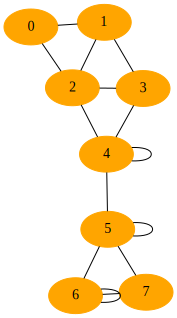

In [48]:
Grafo, _ = readAdjl("Ejemplo")
for i, edges in enumerate(Grafo):
  print(f"{i:2}: {edges}")
adjlShow(Grafo)

In [47]:
BFS(Grafo, 0)

IndexError: ignored